## Introduction
Many figure skating fans believe that skaters who compete in internation competitions held in the country they represent have an advantage over their competitors from other countries. There are several potential reasons for this; skaters might perform better in front of a home crowd or judges could be an implicitly bias towards skaters competiting at home despite the fact that at every internation competition, each judge is from a different federation. The Grand Prix Series is a series of 6 competitions held each held in different countries. Each skater competes at 2 and earn points to qualify for the final. Typically, the 6 competitions in the series are held in the same 6 countries every year: USA, Canada, France, China, Russia, and Japan. Since 2022, Russia has been replaced with Finland. China chooses to opt out for some seasons and has been replaced by either Italy or Great Britain. A majority of skaters competing on the Grand Prix Series represent these countries. Many skaters will compete at one Grand Prix competition held in their home country. We want to know if scores at these competitions are consistently higher than scores at their other Grand Prix competition outside of their home country. Data is collected from SkatingScores.com, a site that collects and publishes scoring data from the International Skating Union. The variables being studied are `Score`, `Country Represented`, and `Home Competition?`. We will perform a paired t-test to see whether the average difference between scores at Grand Prix competitions held in the skater's home country and scores at other Grand Prix competitions held outside the skater's home country is significantly larger than 0.

## Methods
Our hypothesis will be #TODO render in latex H0: mu_d = 0 and H1: mu_d > 0 conducted at a 5% significance level. We will examine total combined scores from skaters who compete at 2 Grand Prix competitions, where one competition is held in their home country and the other is held outside their home country. Scores from skaters who do not meet these criteria will not be considered. We will calculate the difference in scores for each skater,

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('grand_prix_dataset.csv')
data

,Skater,Country Represented,Score,Country of Competition,Discipline,Season,Home Competition?
0,Adam Siao Him Fa,FR,217.52,US,Men,2021-2022,False
1,Adam Siao Him Fa,FR,243.29,FR,Men,2021-2022,True
2,Adam Siao Him Fa,FR,268.98,FR,Men,2022-2023,True
3,Adam Siao Him Fa,FR,250.45,JP,Men,2022-2023,False
4,Adam Siao Him Fa,FR,306.78,FR,Men,2023-2024,True
...,...,...,...,...,...,...,...
361,Yuhana Yokoi,JP,189.54,JP,Women,2019-2020,True
362,Yuma Kagiyama,JP,273.14,FR,Men,2023-2024,False
363,Yuma Kagiyama,JP,288.39,JP,Men,2023-2024,True
364,Yuzuru Hanyu,JP,322.59,CA,Men,2019-2020,False


We want to drop values where scores are NaNs. However, we have to ensure that all the skaters in the dataframe are present at 2 competitions per season, so if we drop one observation, we have to drop the other observationn from the second competition.

In [6]:
if True in data['Score'].isna().values:
    skaters_to_drop = list(data[data['Score'].isna()]['Skater'])
    seasons_competed = list(data[data['Score'].isna()]['Season'])
    data = data[~data['Skater'].isin(skaters_to_drop) & ~data['Season'].isin(seasons_competed)]

    

Average scores vary by discipline. For example, men's scores tend to be higher than women's scores because their elements are more difficult. We will standardize each discipline separately using StandardScaler

In [7]:
# must standardize by discipline
scalers_by_discipline = {}
discipline_groups = data.groupby('Discipline')
for name, group in discipline_groups:
    scaler = StandardScaler()
    scaler.fit(group['Score'].values.reshape(-1,1))
    scalers_by_discipline[name] = scaler
scalers_by_discipline

{'Dance': StandardScaler(),
 'Men': StandardScaler(),
 'Pairs': StandardScaler(),
 'Women': StandardScaler()}

In [8]:
data['Score'] = data.apply(lambda x: scalers_by_discipline[x['Discipline']].transform(np.array(x['Score']).reshape(-1,1))[0][0], axis=1)

C:\Users\khued\AppData\Local\Temp\ipykernel_4696\3947264885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Score'] = data.apply(lambda x: scalers_by_discipline[x['Discipline']].transform(np.array(x['Score']).reshape(-1,1))[0][0], axis=1)


We will get the scores from the competition held at the skater's home country and the competition held outside of their home country. We have to make sure that the scores in each array correspond to each other (ie a score listed first in the array belongs to the same skater in the same season)

In [33]:
home_grand_prix= data[data['Home Competition?'] == True]
home_grand_prix = home_grand_prix.rename(columns={'Score':'Home Score'})
other_grand_prix = data[data['Home Competition?'] == False]
other_grand_prix = other_grand_prix.rename(columns={'Score':'Away Score'})

In [36]:
reformatted_df = home_grand_prix.merge(other_grand_prix, on=['Skater', 'Country Represented','Discipline',
                                                             'Season'])
reformatted_df

,Skater,Country Represented,Home Score,Country of Competition_x,Discipline,Season,Home Competition?_x,Away Score,Country of Competition_y,Home Competition?_y
0,Adam Siao Him Fa,FR,0.657964,FR,Men,2022-2023,True,0.082531,JP,False
1,Adam Siao Him Fa,FR,1.831810,FR,Men,2023-2024,True,1.570956,CN,False
2,Alaine Chartrand,CA,-0.497321,CA,Women,2018-2019,True,-1.148923,US,False
3,Alexander Samarin,RU,0.517289,RU,Men,2019-2020,True,0.537474,FR,False
4,Alexandra Trusova,RU,1.936419,RU,Women,2019-2020,True,2.192294,CA,False
...,...,...,...,...,...,...,...,...,...,...
140,Wesley Chiu,CA,-0.815244,CA,Men,2023-2024,True,-1.199695,JP,False
141,Xiangyi An,CN,-1.271196,CN,Women,2023-2024,True,-0.761790,US,False
142,Yuhana Yokoi,JP,0.181235,JP,Women,2019-2020,True,-0.086750,RU,False
143,Yuma Kagiyama,JP,1.260725,JP,Men,2023-2024,True,0.787149,FR,False


In [37]:
home_grand_prix_total_scores = reformatted_df['Home Score'].values
other_grand_prix_total_scores = reformatted_df['Away Score'].values

We plot the average scores for home competitions and away competitions to compare the differences

([0, 1],
 [Text(0, 0, 'Average Home Grand Prix Score'),
  Text(1, 0, 'Average Grand Prix Score Outside Home Country')])

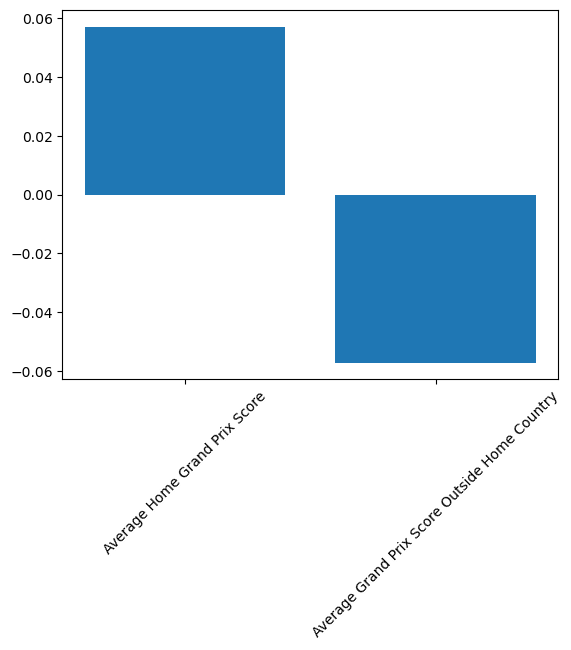

In [47]:
plt.bar(['Average Home Grand Prix Score', 'Average Grand Prix Score Outside Home Country'], [np.mean(home_grand_prix_total_scores), np.mean(other_grand_prix_total_scores)],)
plt.xticks(rotation=45)

We will perform a paired t-test using 2 methods. The first is a hypothesis-based test using the t-distribution and the second is a simulation-based test using bootstrap samples. The test will be one-sided. We will also find the confidence interval

In [49]:
# t test
t_stat, p_val = ttest_rel(home_grand_prix_total_scores, other_grand_prix_total_scores, alternative='greater')
print(f'Test Statistic: {t_stat}')
print(f'p-value: {p_val}')

Test Statistic: 2.597109347836686
p-value: 0.005188471067448112


In [51]:
# confidence interval 
differences = home_grand_prix_total_scores - other_grand_prix_total_scores
mean_differences = np.mean(differences)
sd_differences = np.std(differences, ddof = 1)
lower_bound = mean_differences - t.pdf(0.975, len(differences)-1)*(sd_differences)/np.sqrt(len(differences))
upper_bound = mean_differences + t.pdf(0.975, len(differences)-1)*(sd_differences)/np.sqrt(len(differences))
print(f"Confidence Interval: ({lower_bound}, {upper_bound}")

Confidence Interval: (0.1034860396879601, 0.1252547918157336


(array([ 1.,  0.,  3.,  5.,  6.,  5., 13., 16., 28., 24., 10.,  9., 10.,
         4.,  3.,  3.,  2.,  1.,  0.,  2.]),
 array([-1.33998606, -1.179941  , -1.01989594, -0.85985087, -0.69980581,
        -0.53976075, -0.37971568, -0.21967062, -0.05962556,  0.10041951,
         0.26046457,  0.42050963,  0.5805547 ,  0.74059976,  0.90064482,
         1.06068989,  1.22073495,  1.38078001,  1.54082507,  1.70087014,
         1.8609152 ]),
 <BarContainer object of 20 artists>)

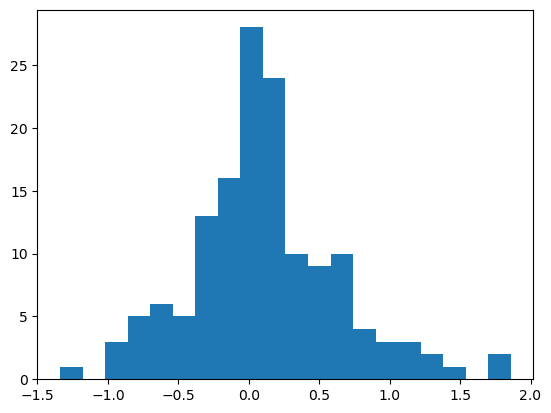

In [23]:
plt.hist(differences, bins=20)

In [43]:
from scipy.stats import t
p_value = 1-t.cdf(test_stat, len(differences)-1)
print(f'p-value: {p_value}')

p-value: 0.0051884710674481305


In [26]:
#TODO add confidence interval